# This is Part 4 Notepook - Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time  
import ast
import pytz

import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score
from sklearn.metrics import precision_recall_curve, make_scorer
from sklearn.metrics import roc_curve, auc


from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\dkaza\Documents\0 Berkeley - ML and AI\0_Capstone\encoded_w_outliers.csv")

In [3]:
df.head()

,user_is_clicker,premium_inventory,target,bun_ctr_30d_log,u_imp_depth_offer_d90_log,u_click_depth_camp_d90_log,request_make_Alcatel,request_make_Apple,request_make_Asus,request_make_Azom Tech,...,user_primary_category_d90_83.0,user_primary_category_d90_84.0,user_primary_category_d90_85.0,user_primary_category_d90_86.0,user_primary_category_d90_87.0,user_primary_category_d90_88.0,user_primary_category_d90_89.0,user_primary_category_d90_90.0,user_primary_category_d90_95.0,user_primary_category_d90_162.0
0,0,1,0,0.000115,1.791759,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.000278,3.610918,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.005764,0.693147,0.000000,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0.000020,2.397895,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0.000030,1.945910,0.693147,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(['target'],axis=1)
y = df['target']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [6]:
X_train.shape

(6862, 245)

In [7]:
X_test.shape

(2942, 245)

# Baseline Model

Before we build our first model, we want to create a dummy classifier baseline

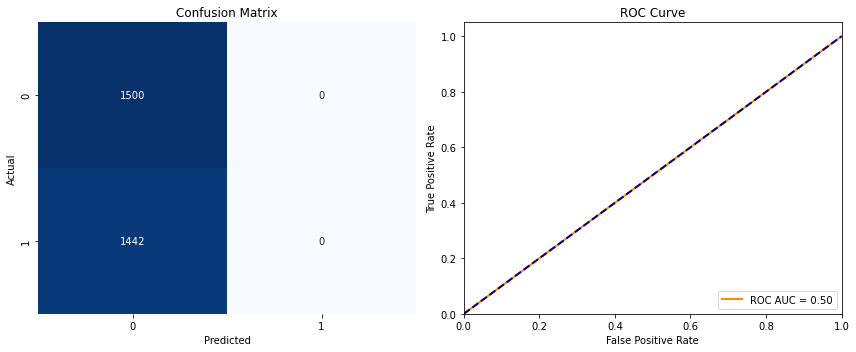

Accuracy: 0.51
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
LogLoss: 16.93
ROC AUC: 0.50


In [8]:
# Create a dummy classifier that predicts the majority class (0)
dummy_classifier = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier on the training data
dummy_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_classifier.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
y_prob = dummy_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = dummy_classifier.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


## Observation:
- As expected, the dummy classifier classifies everything as Class 0 (majority class)
- The metrics are pretty bad too

# Decision Tree - Basic

In [9]:
# Start the timer
start_time = time.time()

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# End the timer
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

Elapsed Time: 0.04987001419067383


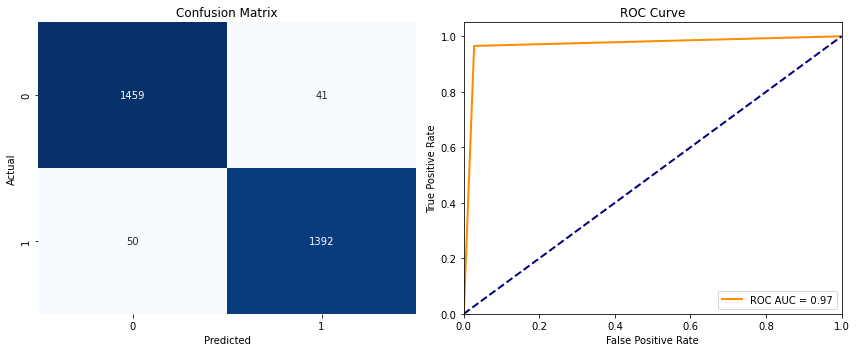

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
LogLoss: 0.90
ROC AUC: 0.97


In [10]:
# Now let us see how basic DT performs

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = dt_classifier.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Observation:
- Not too shabby! Basic Decision Tree perforamance against Test data is very nice!
- Compared to the dummy classifier, LogLoss dropped from 16.93 to 0.9

# Decision Tree - Optimized

In [11]:

# Start the timer
start_time = time.time()

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(5, 51, 5)),
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create a GridSearchCV object with custom scoring
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_log_loss'
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

# Get the best estimator (best model)
best_dt_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits
Elapsed Time: 26.259227752685547
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}


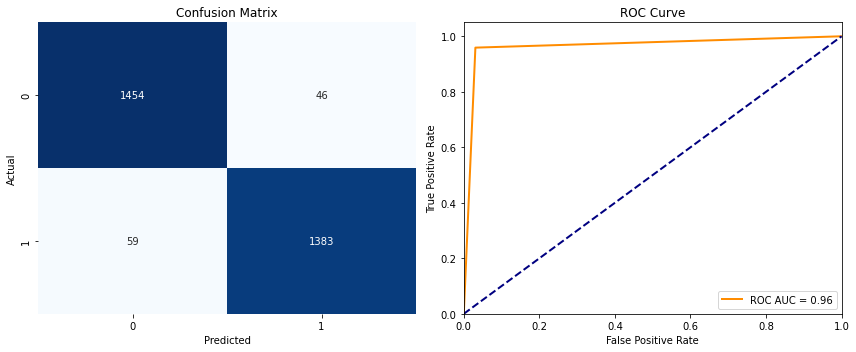

Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.96
LogLoss: 0.15
ROC AUC: 0.99


In [12]:
# Now let us see how Optimized DT performs

# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observation:
LogLoss Improved quite a bit from 0.9 for unoptimized tree to just 0.15 

# Random Forest - Basic

In [13]:
# Start the timer
start_time = time.time()

# Create a RandomForestClassifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# End the timer
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

Elapsed Time: 0.7970397472381592


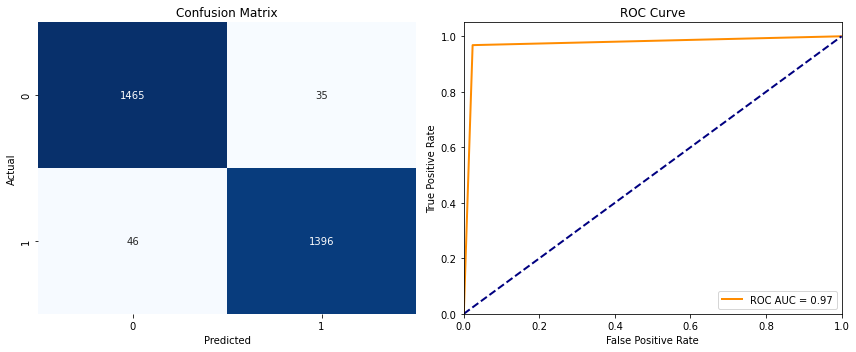

Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
LogLoss: 0.20
ROC AUC: 0.99


In [14]:
# Now let us see how Random Forest performed

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observation:
- LogLoss for Basic Random Forest is quite a bit better than for Basic Tree (0.2 vs 0.9). However, it is still worse than the optimise Tree LogLos, which was 0.15.
- All other parameters look great. 
- Let us see if we can further finetune the model through Hyperparameter Tuning

# Random Forest - Optimized

In [15]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
    # Add other parameters if needed
}

# Create a GridSearchCV object with LogLoss scoring
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_log_loss'
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

# Get the best estimator (best model)
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Elapsed Time: 190.2257251739502
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


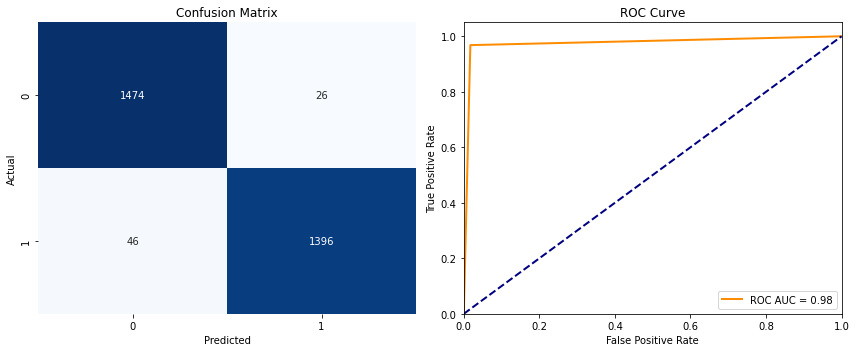

Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
LogLoss: 0.09
ROC AUC: 0.99


In [16]:
# Now let us see how Optimized Random Forest performed

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observation:
- Damn Nice! LogLoss is now only 0.09!
- Other parameters also look great. 

# Basic SVM

In [23]:
# Start the timer
start_time = time.time()

# Create the SVC model with probability enabled
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

# End the timer and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

Elapsed Time: 6.215879917144775


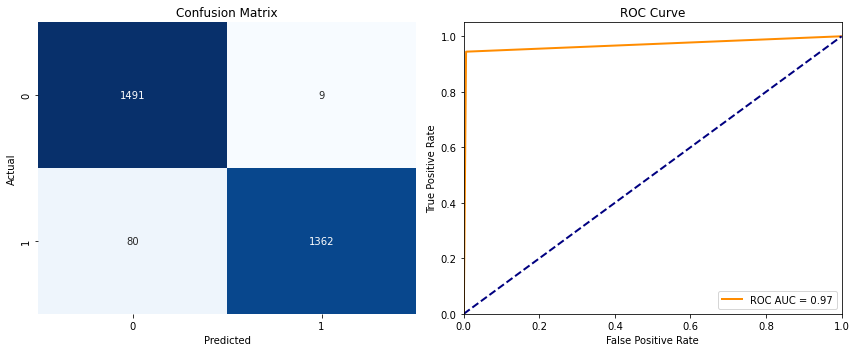

Accuracy: 0.97
Precision: 0.99
Recall: 0.94
F1 Score: 0.97
LogLoss: 0.11
ROC AUC: 0.99


In [24]:
# Now let us see how Basic SVM did 

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = svc.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observation:
 - Not a bad Log Loss out of the box for SVM!

# SVM - Optimized

In [26]:
# Start the timer
start_time = time.time()

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),  # Enable probability for ROC AUC
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_log_loss'  # Optimize for LogLoss
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

# Get the best estimator (best model)
best_svc = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Elapsed Time: 1233.6367440223694
Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


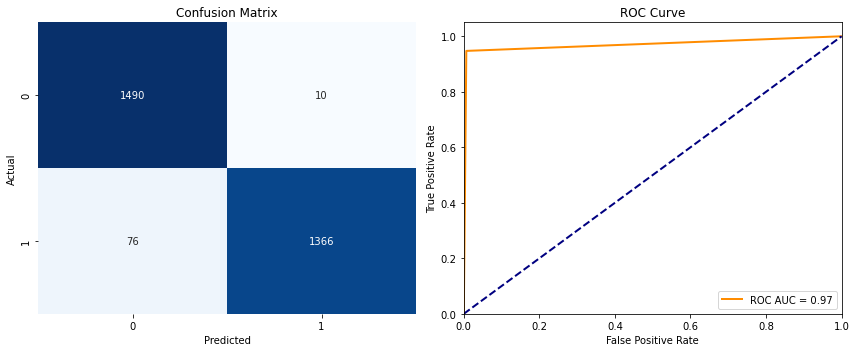

Accuracy: 0.97
Precision: 0.99
Recall: 0.95
F1 Score: 0.97
LogLoss: 0.10
ROC AUC: 0.99


In [27]:
# Now let us see how Basic SVM did 

# Make predictions on the test data
y_pred = best_svc.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = best_svc.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observations:
- SVM Grid Seach took a long time
- LogLoss improved slightly: from 0.11 to 0.1

# Logistic Regression - Basic Model


In [17]:
# Start measuring time
start_time = time.time()

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1, max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Stop measuring time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Print Training / Search time and Best Hyperparameters
print("Training Time:", training_time, "seconds")


Training Time: 0.143690824508667 seconds


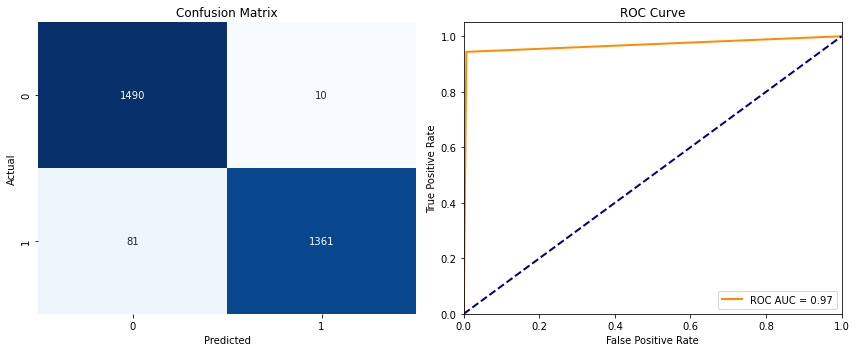

Accuracy: 0.97
Precision: 0.99
Recall: 0.94
F1 Score: 0.97
LogLoss: 0.09
ROC AUC: 0.99


In [18]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = logistic_model.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

In [ ]:
## Obsrvation:
- Off the shelf Logistic Regression is very very nice! 
- LogLoss is only 0.09 --even without hyperparamter tuning.

## Optimized Logistic Regression

We will want to optimize to LogLoss (negative log Loss, since the optimizer is mazimizing the function)

In [19]:
# Start measuring time
start_time = time.time()

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [5000, 10000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=1), 
                           param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1,
                          scoring='neg_log_loss'
                          )

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Stop measuring time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

# Retrieve the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print Training / Search time and Best Hyperparameters
print("Training Time:", training_time, "seconds")
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Training Time: 394.5786623954773 seconds
Best Hyperparameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}


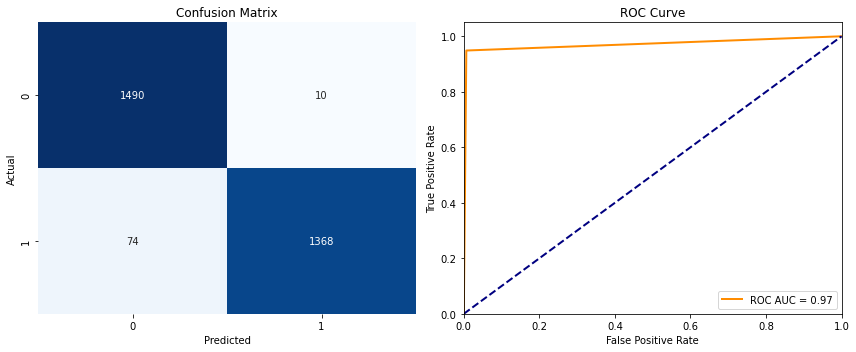

Accuracy: 0.97
Precision: 0.99
Recall: 0.95
F1 Score: 0.97
LogLoss: 0.09
ROC AUC: 0.99


In [20]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# For LogLoss and ROC AUC, we need the probability estimates of the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

In [ ]:
## Observation:
- Excellent performacne for LogLoss as well. 

# KNN - Basic

In [28]:
# instantiate the model (using the default parameters)
KNN = KNeighborsClassifier()

# Start the timer
start_time = time.time()

# fit the model with data
KNN.fit(X_train, y_train)

# End the timer
end_time = time.time()

# Calculate the difference
elapsed_time = end_time - start_time

print('Elapsed Time:', elapsed_time)

y_pred = KNN.predict(X_test)
KNN_score_train = KNN.score(X_train, y_train)
KNN_score_test = KNN.score(X_test, y_test)
print('KNN Score Train:', KNN_score_train)
print('KNN Score Test:', KNN_score_test)

Elapsed Time: 0.009003877639770508
KNN Score Train: 0.9626930923928884
KNN Score Test: 0.9435757987763427


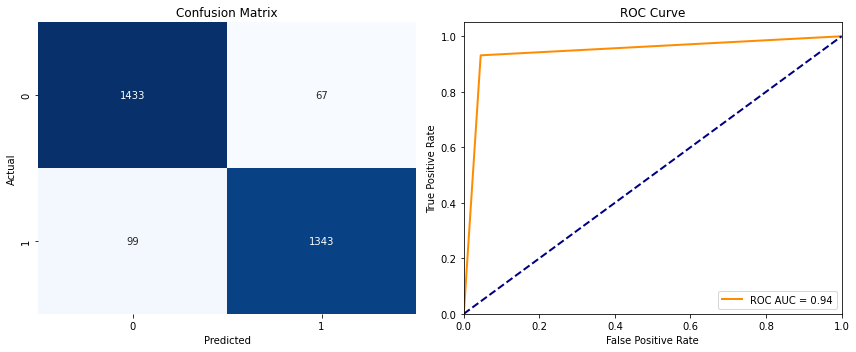

Accuracy: 0.94
Precision: 0.95
Recall: 0.93
F1 Score: 0.94
LogLoss: 0.57
ROC AUC: 0.98


In [35]:
# Now let us see how basic KNN performs

# Make predictions using the best model
y_pred = KNN.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = KNN.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observations:
- Not the best performace for the out of box KNN compared to some other models

# KNN - Optimized

In [34]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Start the timer
start_time = time.time()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_log_loss'
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()

elapsed_time = end_time - start_time
print('Elapsed Time:', elapsed_time)

# Print the best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Refit the KNN model using the best hyperparameters
best_knn = grid_search.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Elapsed Time: 58.3354275226593
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


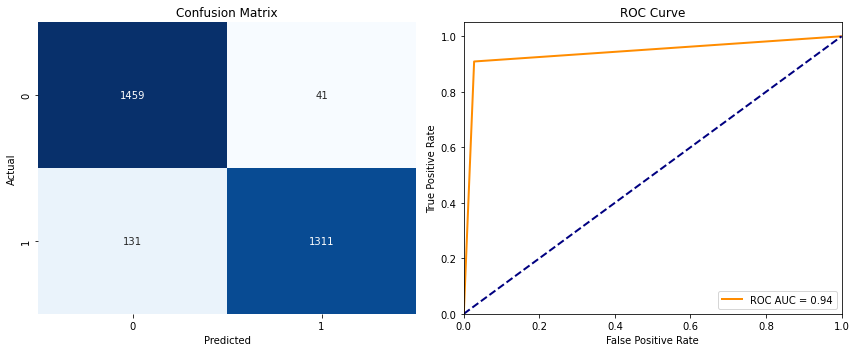

Accuracy: 0.94
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
LogLoss: 0.27
ROC AUC: 0.99


In [36]:
# Now let us see how best KNN performs

# Make predictions using the best model
y_pred = best_knn.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a figure with two subplots for confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Compute and print main metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# For LogLoss and ROC AUC, you need the probability estimates of the positive class
y_prob = best_knn.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'LogLoss: {log_loss_value:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Observation
- A decent improvement in LogLoss

# Summary

In [40]:
# Data
summary_dict = {
    'Model': ['Baseline', 'Decision Tree Basic', 'Decision Tree Optimized', 
              'Random Forest Basic', 'Random Forest Optimized', 
              'SVM Basic', 'SVM Optimized', 
              'Logistic Regression Basic', 'Logistic Regression Optimized', 
              'KNN Basic', 'KNN Optimized'],
    'Accuracy': [0.51, 0.97, 0.96, 0.97, 0.98, 0.97, 0.97, 0.97, 0.97, 0.94, 0.94],
    'Precision': [0.00, 0.97, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.95, 0.97],
    'Recall': [0.00, 0.97, 0.96, 0.97, 0.97, 0.94, 0.95, 0.94, 0.95, 0.93, 0.91],
    'F1 Score': [0.00, 0.97, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.94, 0.94],
    'ROC AUC': [0.50, 0.97, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99],
    'LogLoss': [16.93, 0.90, 0.15, 0.20, 0.09, 0.11, 0.10, 0.09, 0.09, 0.57, 0.27]
}

# Convert to DataFrame
summary = pd.DataFrame(summary_dict)

In [41]:
summary

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,LogLoss
0,Baseline,0.51,0.00,0.00,0.00,0.50,16.93
1,Decision Tree Basic,0.97,0.97,0.97,0.97,0.97,0.90
2,Decision Tree Optimized,0.96,0.97,0.96,0.96,0.99,0.15
3,Random Forest Basic,0.97,0.98,0.97,0.97,0.99,0.20
4,Random Forest Optimized,0.98,0.98,0.97,0.97,0.99,0.09
5,SVM Basic,0.97,0.99,0.94,0.97,0.99,0.11
6,SVM Optimized,0.97,0.99,0.95,0.97,0.99,0.10
7,Logistic Regression Basic,0.97,0.99,0.94,0.97,0.99,0.09
8,Logistic Regression Optimized,0.97,0.99,0.95,0.97,0.99,0.09
9,KNN Basic,0.94,0.95,0.93,0.94,0.98,0.57


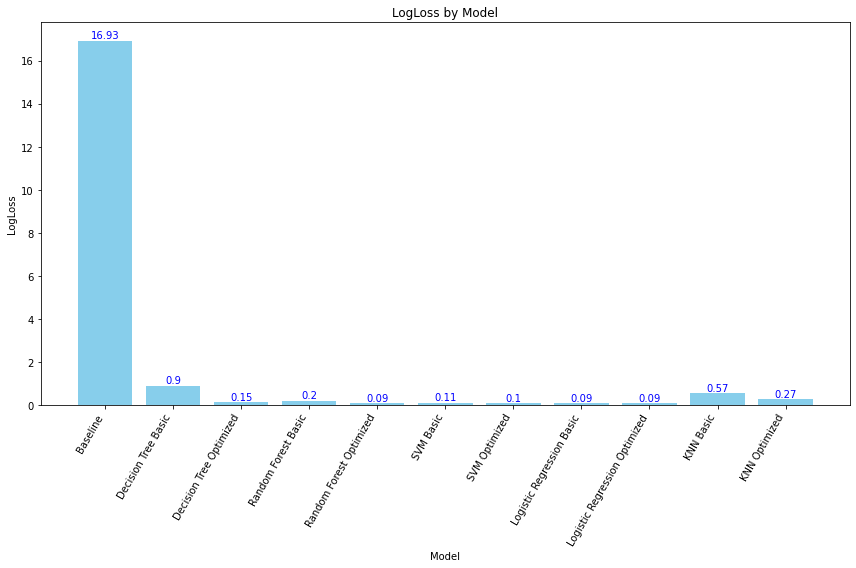

In [46]:
# Plotting the bar graph for LogLoss by Model with annotations
plt.figure(figsize=(12, 8))
bars = plt.bar(summary['Model'], summary['LogLoss'], color='skyblue')

# Adding the text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='blue')

plt.xlabel('Model')
plt.ylabel('LogLoss')
plt.title('LogLoss by Model')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()
